In [101]:
import numpy as np
import cmath

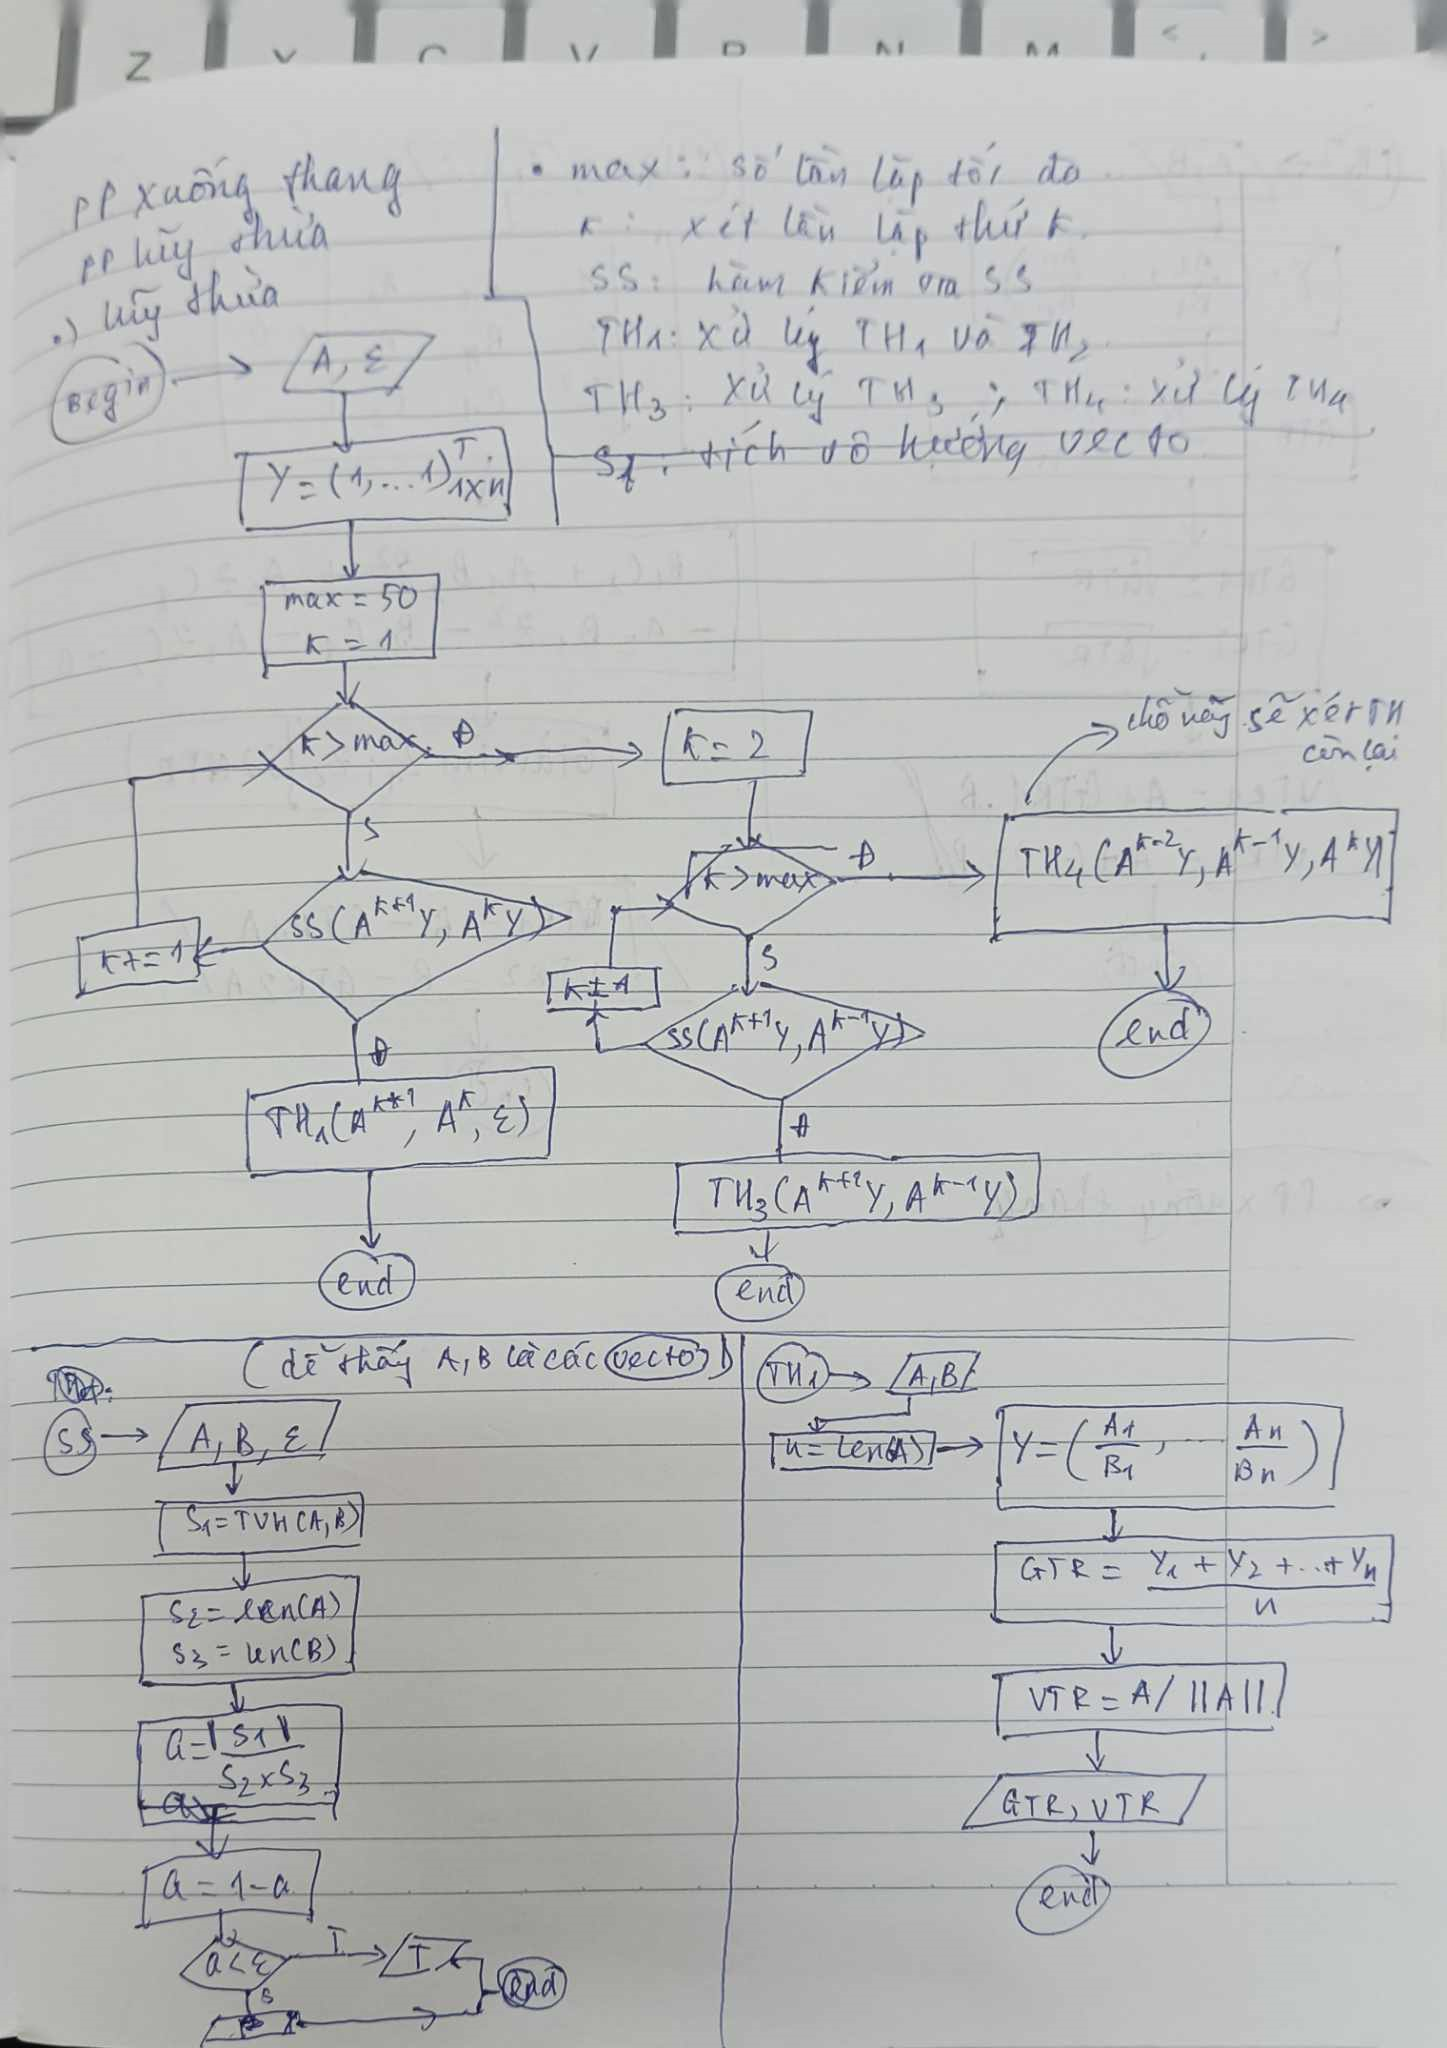  
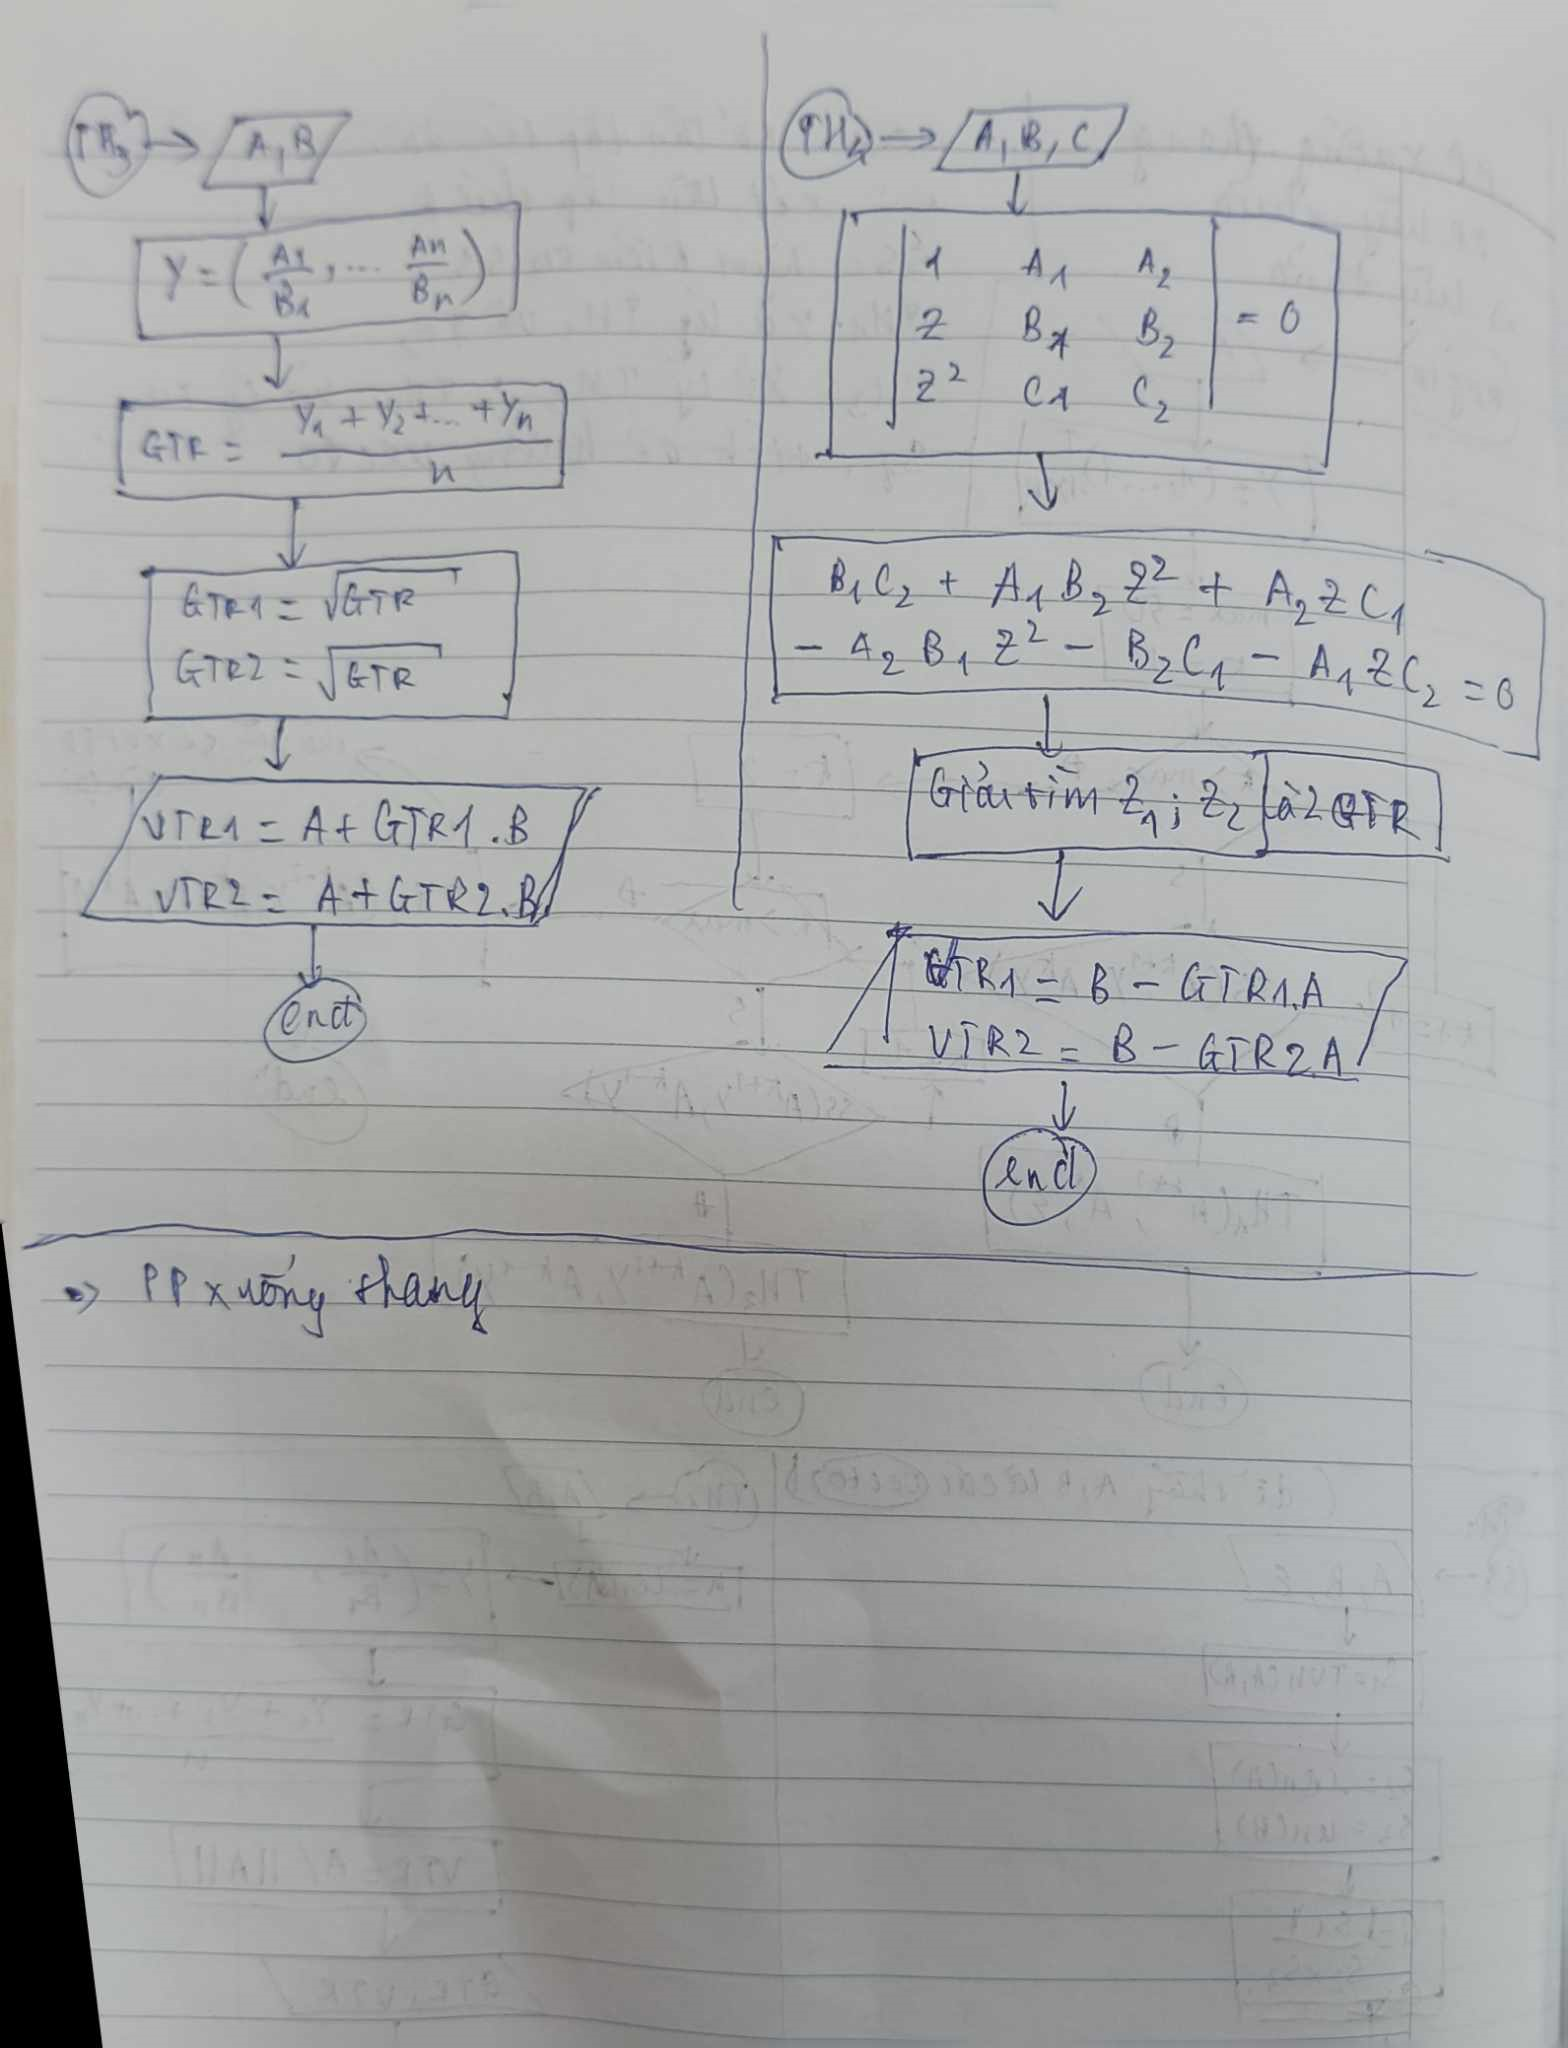  
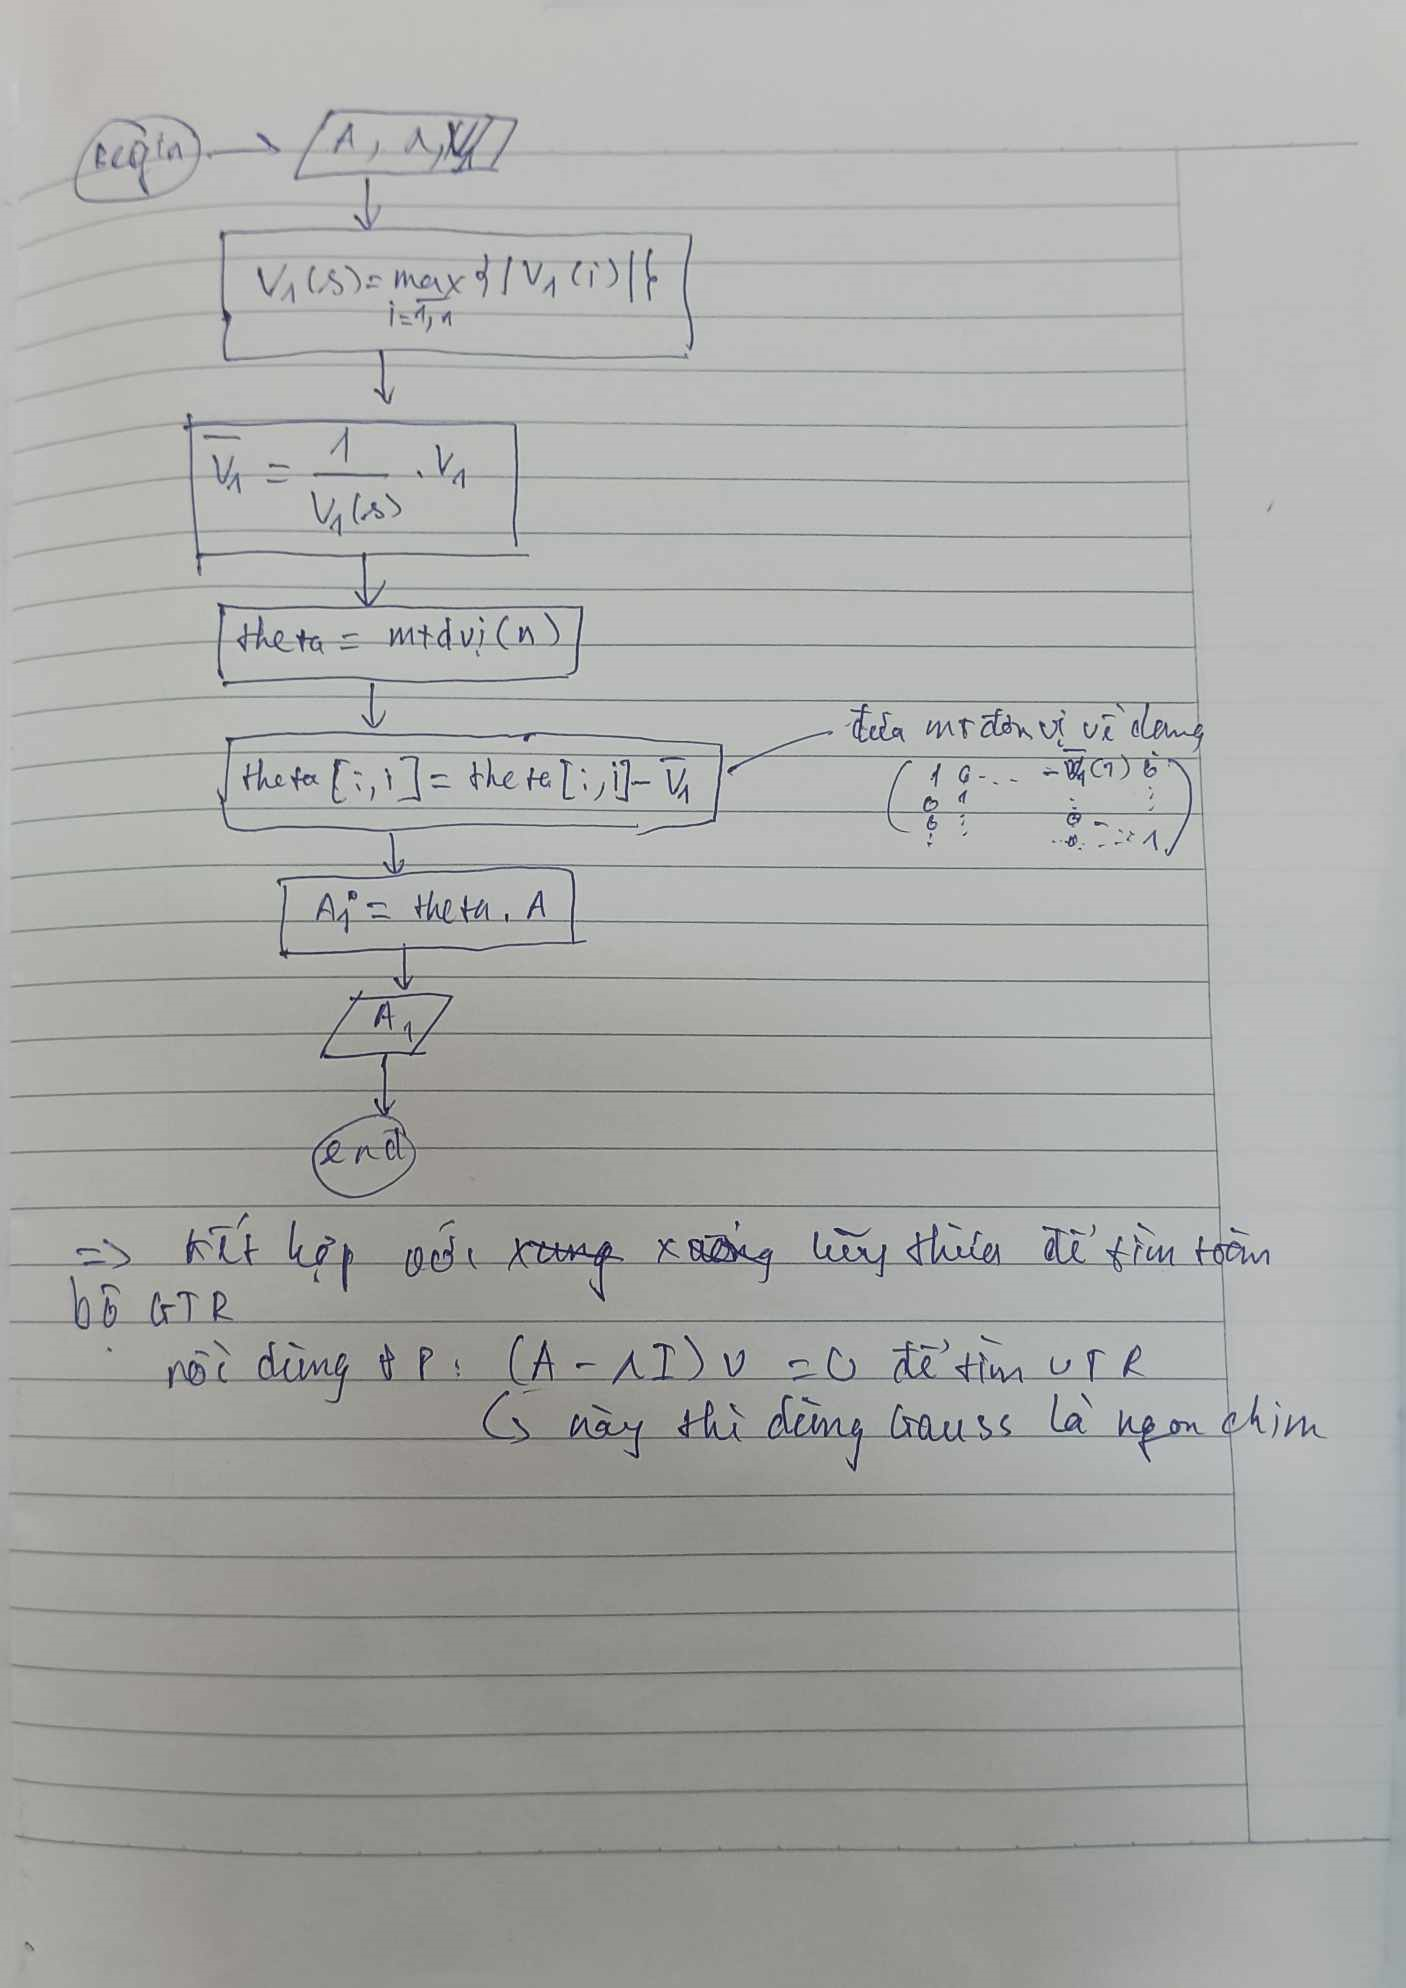

In [1]:
# ngoài lề: in ma trận 
import numpy as np

def print_matrix(matrix, precision=4):
    """
    In ma trận với định dạng đẹp và tùy chọn số chữ số sau dấu phẩy.
    
    Tham số:
    matrix (numpy.ndarray): Ma trận cần in.
    precision (int): Số chữ số sau dấu phẩy.
    """
    format_string = "{:." + str(precision) + "f}"
    rows, cols = matrix.shape
    
    for i in range(rows):
        row_str = "    ".join([format_string.format(matrix[i, j]) for j in range(cols)])
        print(row_str)





In [5]:
import numpy as np
A = np.array([[13,0,0,0,0],[0,-13,0,0,0],[0,0,-2,0,0],[0,0,0,2,0],[0,0,0,0,13]])


In [1]:
import numpy as np
A = np.array([[-2,1,1,1],
              [-7,-5,-2,-1]
              ,[0,-1,-3,-2]
              ,[-1,0,-1,0]])

In [15]:
import numpy as np
A = np.array([[9,10,3,10,10],[10,7,6,2,5],[2,1,10,10,9]])
M = A@A.T

In [25]:
import numpy as np
A = np.array([[1,0,2,-3,1],[2,-2,1,5,7],[3,5,0,2,-4]])
M = A@A.T # rút gọn lấy bé, đầy đủ lấy lớn 
M

array([[ 15,  -4,  -7],
       [ -4,  83, -22],
       [ -7, -22,  54]])

## làm ở đây

In [1]:
import numpy as np
A = np.array([[4, 1, 1], [2, 3, 1], [1, 7, 2]], dtype=float)

In [30]:
import numpy as np

def th1(A, B):
    print('Phương pháp th1:')
    n = len(A)
    Y = np.zeros(n)
    count = 0
    for i in range(n):
        if B[i] != 0:
            Y[i] = A[i] / B[i]
            count += 1
    
    gtr = np.sum(Y) / count if count > 0 else 0  # Prevent division by zero
    norm_a = np.linalg.norm(A) # chuan tinh vtr
    vtr = A / norm_a if norm_a != 0 else np.zeros_like(A)
    return gtr, vtr

def th3(A, B, C):
    print('Phương pháp th3:')
    n = len(A)
    Y = np.zeros(n)
    count = 0
    for i in range(n):
        if B[i] != 0:
            Y[i] = A[i] / B[i]
            count += 1

    gtr = np.sum(Y) / count if count > 0 else 0  # Prevent division by zero
    
    gtr1 = round(gtr**0.5, 3)
    gtr2 = round(-gtr**0.5, 3)
    vtr1 = C + gtr1 * A
    vtr1 = vtr1 / np.linalg.norm(vtr1)
    vtr2 = C + gtr2 * A
    vtr2 = vtr2 / np.linalg.norm(vtr2)
    return vtr1, vtr2, gtr1, gtr2

def th4(A, B, C):
    print('Phương pháp th4:')
    coefficients = [A[1]*B[2] - A[2]*B[1], A[2]*C[1] - A[1]*C[2], B[1]*C[2] - B[2]*C[1]]
    roots = np.roots(coefficients)
    gtr1 = roots[0]
    gtr2 = roots[1]
    vtr1 = B - gtr1 * A
    vtr1 = vtr1 / vtr1[0]
    vtr2 = B - gtr2 * A
    vtr2 = vtr2 / vtr2[0]
    return gtr1, gtr2, vtr1, vtr2

def ss(A, B, ep):
    s1 = np.dot(A, B)
    s2 = np.linalg.norm(A)
    s3 = np.linalg.norm(B)
    a = np.abs(s1) / (s2 * s3)
    a = 1 - a
    return a <= ep

def pp_luy_thua(A, ep):
    n = A.shape[0]
    Y = np.ones((n, 1))  # Y = np.array([[1],[1],[0],[0]])
    Ak = np.eye(n)
    
    # Vòng lặp đầu tiên
    for k in range(50):
        Ak = Ak @ A  # Cập nhật Ak = A^k
        aky = (Ak @ Y).flatten()
        print("A^k@Y lần",k,' ',aky)
        print("----------------------------------")
        ak1y = (Ak @ A @ Y).flatten()  # Tính A^(k+1) * Y bằng cách nhân thêm A vào Ak

        if ss(aky, ak1y, ep):
            gtr, vtr = th1(ak1y, aky)
            print(f"Giá trị riêng: {gtr}")
            print(f"Vector riêng: {vtr}")
            return gtr, vtr
    
    # Vòng lặp thứ hai
    Ak = np.eye(n)
    for k in range(50):
        Ak = Ak @ A  # Cập nhật Ak = A^k
        ak0y = (Ak @ Y).flatten()
        ak1y = (Ak @ A @ A @ Y).flatten()  # Tính A^(k+2) * Y bằng cách nhân thêm A vào Ak
        ak2y = (Ak @ A @ Y).flatten()  # Tính A^(k+1) * Y
        if ss(ak0y, ak1y, ep):
            vtr1, vtr2, gtr1, gtr2 = th3(ak1y, ak0y, ak2y)
            print(f"Giá trị riêng thứ nhất: {gtr1}")
            print(f"Vector riêng thứ nhất: {vtr1}")
            print(f"Giá trị riêng thứ hai: {gtr2}")
            print(f"Vector riêng thứ hai: {vtr2}")
            return vtr1, gtr1, vtr2, gtr2
    
   
    gtr1, gtr2, vtr1, vtr2 = th4(ak0y, ak2y, ak1y)
    print(f"Giá trị riêng thứ nhất: {gtr1}")
    print(f"Vector riêng thứ nhất: {vtr1}")
    print(f"Giá trị riêng thứ hai: {gtr2}")
    print(f"Vector riêng thứ hai: {vtr2}")
    return gtr1, gtr2, vtr1, vtr2

# Ví dụ sử dụng

ep = 1e-9


result = pp_luy_thua(A2, ep)


A^k@Y lần 0   [17.55360328  0.          0.        ]
----------------------------------
Phương pháp th1:
Giá trị riêng: 12.787458299697349
Vector riêng: [1. 0. 0.]


## phương pháp xuống thang 

In [29]:
def xuong_thang(A, V):
    # Giả sử V là một vector
    v1s = abs(V[0])
    tmp = 0
    n = A.shape[0]
    
    # Tìm giá trị lớn nhất trong V và vị trí của nó
    for i in range(len(V)):
        if v1s < abs(V[i]):
            v1s = abs(V[i])
            tmp = i
    print('v1s - max(V[i])',v1s)        
    # Tính Vbar
    Vbar = (1 / v1s) * V 
    print('Vbar : ',Vbar)
    print("---------------")
    # Tạo ma trận đơn vị theta
    theta = np.eye(n)
    # Điều chỉnh cột tmp của theta
    theta[:, tmp] = theta[:, tmp] - Vbar
    print('theta')
    print(theta)
    # Tính A1 bằng cách nhân theta với A
    A1 = theta @ A
    
    return A1
V =np.array([-0.23380481 , 0.  ,        0.97228355]) # thay V chỗ này nếu mà V có 2 phần tử max bằng nhau thì tự xử lý bằng cách thử từng max, t k viết vì nó khá phức tạp
A1 = xuong_thang(M , V) 
#A2 = xuong_thang(A1 , V)
#A3 = xuong_thang(A1 , V)
#A4 = xuong_thang(A1 , V)
print('----------------------')
print(A1)
#print(A2)
#print(A3)
#print(A4)

v1s - max(V[i]) 0.97228355
Vbar :  [-0.24046978  0.          1.        ]
---------------
theta
[[1.         0.         0.24046978]
 [0.         1.         0.        ]
 [0.         0.         0.        ]]
----------------------
[[12.7874583   1.69166981  3.07447517]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


## thử với thư viện 

In [12]:
import numpy as np

# Định nghĩa ma trận A


# Tính trị riêng và vector riêng
eigenvalues, eigenvectors = np.linalg.eig(M)

print("Trị riêng (Eigenvalues):")
print(eigenvalues)

print("Vector riêng (Eigenvectors):")
print(eigenvectors)


Trị riêng (Eigenvalues):
[12.78730694 44.36354729 94.84914577]
Vector riêng (Eigenvectors):
[[-0.96433189 -0.26468355  0.00257558]
 [-0.12760253  0.45633019 -0.88061362]
 [-0.23190862  0.84953245  0.47382804]]


In [11]:
# tìm hình chiếu :
U1 = np.array([0.6994713,  0.47661243, 0.53252276])
e1 = U1/(np.linalg.norm(U1))
print(e1)
projU2 = (np.dot(U2,e1))*e1
print(projU2)
V2 = U2 - projU2
print(V2)
e2 = V2/(np.linalg.norm(V2))



[0.6994713  0.47661243 0.53252276]


NameError: name 'U2' is not defined